In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load your files
products = pd.read_csv("/content/drive/MyDrive/apple_datasets/products.csv")
sales = pd.read_csv("/content/drive/MyDrive/apple_datasets/sales.csv")

# Aggregate total units sold per product
sales_agg = sales.groupby("product_id")["quantity"].sum().reset_index()
sales_agg.columns = ["product_id", "total_units_sold"]

# Merge product price with total units sold
df = pd.merge(products[["product_id", "price"]], sales_agg, on="product_id")

df.head()


,product_id,price,total_units_sold
0,P-1,1499,5119
1,P-2,159,5287
2,P-3,649,4859
3,P-4,799,5189
4,P-5,1299,5410


In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['price']]
y = df['total_units_sold']

model = LinearRegression()
model.fit(X, y)

print("Slope (β1):", model.coef_[0])
print("Intercept (β0):", model.intercept_)


Slope (β1): 4.979118644603667
Intercept (β0): 14714.861669077256


In [ ]:
df["pred_python"] = model.predict(df[['price']])

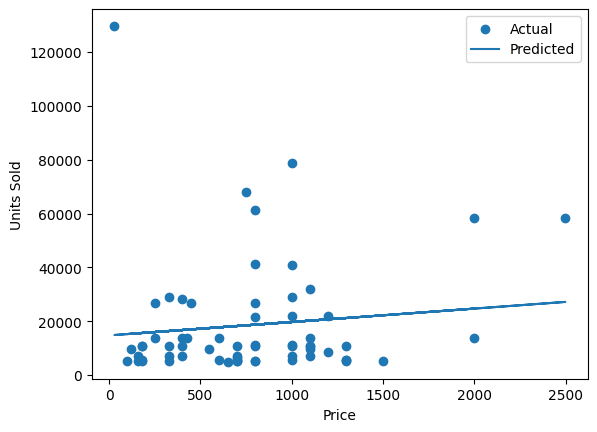

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['price'], df['total_units_sold'], label='Actual')
plt.plot(df['price'], df['pred_python'], label='Predicted')
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(df['total_units_sold'], df['pred_python'])
rmse = np.sqrt(mean_squared_error(df['total_units_sold'], df['pred_python']))

print("R²:", r2)
print("RMSE:", rmse)


R²: 0.01223363821475043
RMSE: 21597.21450583384


In [ ]:
comparison_df = df[['product_id', 'price', 'total_units_sold', 'pred_python']]

comparison_df = comparison_df.rename(columns={
    'total_units_sold': 'actual_units_sold',
    'pred_python': 'predicted_units_sold'
})

# Round predictions
comparison_df['predicted_units_sold'] = comparison_df['predicted_units_sold'].round(2)

# -------------------------------------------------------
# 6. Sort by price descending (to match SQL output)
# -------------------------------------------------------
comparison_df = comparison_df.sort_values(by='price', ascending=False)

# -------------------------------------------------------
# 7. Show final comparison table
# -------------------------------------------------------
comparison_df.head(10)


,product_id,price,actual_units_sold,predicted_units_sold
48,P-49,2499,58216,27157.68
47,P-48,1999,58171,24668.12
52,P-53,1999,13896,24668.12
0,P-1,1499,5119,22178.56
38,P-39,1299,10884,21182.74
4,P-5,1299,5410,21182.74
5,P-6,1299,5209,21182.74
29,P-30,1299,5436,21182.74
16,P-17,1199,8509,20684.82
63,P-64,1199,21784,20684.82
